[[0 0]
 [2 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



c:\Users\MADHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MADHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MADHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


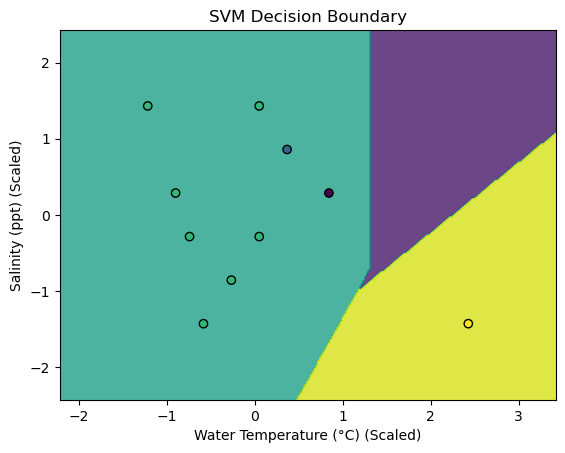

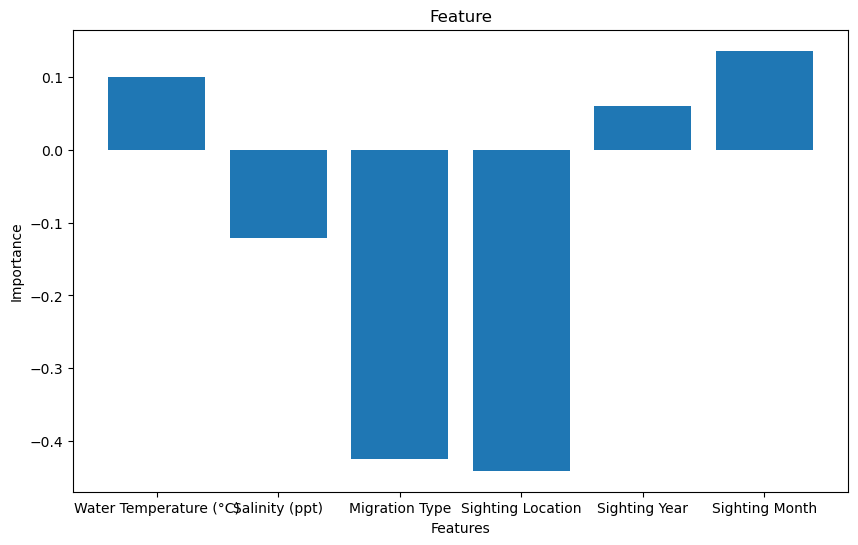

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

# Load the dataset
data = pd.read_csv('deepsea.csv')

# Data preprocessing
# Convert 'Sighting Date' to datetime objects
data['Sighting Date'] = pd.to_datetime(data['Sighting Date'])

# Extract year and month
data['Sighting Year'] = data['Sighting Date'].dt.year
data['Sighting Month'] = data['Sighting Date'].dt.month

# Encode categorical features
label_encoder = LabelEncoder()

data['Migration Type'] = label_encoder.fit_transform(data['Migration Type'])
data['Sighting Location'] = label_encoder.fit_transform(data['Sighting Location'])
data['IUCN Status'] = label_encoder.fit_transform(data['IUCN Status'])
data['Species Name'] = label_encoder.fit_transform(data['Species Name'])


# Select features and target variable
X = data[['Water Temperature (°C)', 'Salinity (ppt)', 'Migration Type', 'Sighting Location', 'Sighting Year', 'Sighting Month']]  # Include year and month
y = data['IUCN Status']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the SVM model
model = SVC(kernel='linear')  # You can experiment with different kernels like 'rbf', 'poly', 'sigmoid'
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Plotting (example with two features) - Adjust features as needed
# This is a simplified plotting example and might not be applicable 
# for all feature combinations, especially with more than 2 features.
# Choose two features for plotting (e.g., 'Water Temperature (°C)' and 'Salinity (ppt)')
feature_1_index = 0  # Index for 'Water Temperature (°C)' after scaling
feature_2_index = 1  # Index for 'Salinity (ppt)' after scaling

X_plot = X_scaled[:, [feature_1_index, feature_2_index]]

# Train a new SVM model using only the two selected features
model_plot = SVC(kernel='linear')
model_plot.fit(X_plot, y)

# Create a meshgrid for plotting
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = model_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolors='k')
plt.xlabel('Water Temperature (°C) (Scaled)')
plt.ylabel('Salinity (ppt) (Scaled)')
plt.title('SVM Decision Boundary')
plt.show()

# Feature Importance (Linear Kernel Only)
if model.kernel == 'linear':
    feature_importance = model.coef_[0]  # Coefficients for the linear kernel
    feature_names = ['Water Temperature (°C)', 'Salinity (ppt)', 'Migration Type', 'Sighting Location', 'Sighting Year', 'Sighting Month']

    # Plotting feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, feature_importance)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature')
    plt.show()
